In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:

import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from datetime import time,timedelta,datetime,date
import pickle








Para poder hacer el clustering primero habrá que extraer los dataframe de cada uno de los ficheros que contienen las series temporales.

In [10]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

mySeries = []
namesofMySeries = []
counter=0
dataframes_list=[]
singleSerie=[]

for filename in os.listdir(directory):

    if filename.endswith(".csv") and filename!='datAxes.csv' :
      df = pd.read_csv(directory+"/"+filename)
      df = df.loc[:,["ocupacion"]]  #cojo la columna indicada
     
      
      dim=len(df.to_numpy()) #calculamos la longitud del dataframe

  
      check=list(df.to_numpy().reshape(dim)[:287])
      mySeries.append(check)  #conseguimos una lista que hemos redimensionado a 1 dimensión y hemos hecho que tenga longitud 287
      singleSerie.extend(list(df.to_numpy().reshape(dim)[:287]))
      if dim<287:
        print(filename+' '+ str(dim))
      
      
      




      namesofMySeries.append(filename)
      counter+=1
ninety=int(len(singleSerie)*0.9)
train=singleSerie[:ninety]
valit=singleSerie[ninety:]

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcupTrT.pkl', 'wb') as file:
        pickle.dump(train, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcupValit.pkl', 'wb') as file:
        pickle.dump(valit, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/mySeriesOcup.pkl', 'wb') as file:
        pickle.dump(mySeries, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcup.pkl', 'wb') as file:
        pickle.dump(singleSerie, file)


print(singleSerie[:30])

[0.07657658, 0.08962264, 0.1132075, 0.09433962, 0.08490566, 0.0990566, 0.1933962, 0.03773585, 0.03773585, 0.05660377, 0.03301887, 0.05188679, 0.1179245, 0.06132076, 0.1037736, 0.08490566, 0.1462264, 0.04245283, 0.09433962, 0.03773585, 0.0754717, 0.03773585, 0.1650943, 0.01886792, 0.01415094, 0.0990566, 0.04245283, 0.04245283, 0.07075471, 0.04716981]


Ahora hacemos el clustering, k es el número de clústers que vamos a querer utilizar.

In [ ]:
k=6
kmeans = KMeans(n_clusters=k, random_state=50)
y_pred = kmeans.fit(mySeries).predict(mySeries)
print(y_pred)
print(kmeans.cluster_centers_)


[1 4 3 4 1 4 4 0 0 4 5 4 4 1 3 4 4 0 2 5 5 0 4 4 0 3 1 1 3 5 3 2 0 0 4 4 4
 2 0 4 1 0 3 4 1 4 4 4 2 3 4 0 4 2 1 4 4 4 2 2 2 4 1 1 0 0 0 5 4 5 0 4 3 2
 2 2 4 4 1 2 4 4 1 0 4 1 1 0 4 4 4 5 1 4 0 1 3 0 2 0 2 4 4 3 0 4 3 3 1 0 4
 4 1 3 0 2 4 4 2 1 5 2 2 0 3 3 1 5 2 1 0 5 4 3 4 4 4 5 4 4 0 3 4 3 4 0 2 2
 0 4 4 2 2 2 2 4 3 4 4 0 4 4 1 0 5 4 4 1 3 1 5 1 4 3 0 4 2 4 2 1 2 0 4 5 2
 2 4 1 4 1 3 4 4 4 0 4 2 1 1 4 0 5 4 3 4 4 3 1 1 3 4 5 4 1 4 2 1 2 4 2 4 3
 4 1 4 4 1 1 4 0 4 2 2 4 3 3 0 0 1 4 3 4 5 2 4 3 3 0 0 3 2 0 4 4 0 2 4 4 4
 3 4 2 4 0 2 4 4 2 2 5 4 5 4 3 1 4 0 4 2 4 2 0 2 5 4 1 1 3 3 4 4 2 4 1 2 4
 3 0 4 0 2 1 2 4 2 2 4 4 2 2 3 4 1 2 1 4 5 3 1 0 4 2 5 2 4 4 1 4 1 4 0 1 0
 4 4 5 3 0 3 4 0 4 2 3 4 4 1 4 0 2 1 4 3 4 4 4 4 0 5 2 2 4 4 3 0 3 0 5 4 4
 2 4 4 1 2 0 4 4 4 4 3 5 1 1 2 3 0 0 2 3 2 0 3 3 1 4 4 4 4 2 1 4 4 4 1 3 2
 0 5 3 4 5 4 4 4 1 4 4 2 1 3 0 1 1 0 4 5 0 5 4 1 2 4 4 4 4 4 5 4 4 0 5 2 4
 2 4 0 2 2 4 4 5 4 4 2 4 5 4 4 4 2 4 1 3 0 0 4 0 1 1 4 4 3 4 3 4 2 0 1 0 0
 4 3 0 0 4 4 4 1 4 4 3 4 

Distancias al centro del clúster, como vemos en la celda superior y_pred da un array con el cluster al que pertenece cada serie según la posición q.ue ocupa, es decir, si el primer elemento del array es un 2 quiere decir que la primera series pertenece al clúster 2. Además con kmeans.cluster_centers_ podemos conseguir las coordenada de cada centro

In [ ]:
dias_senalar=[]

for m in range(len(mySeries)):
  #para cada serie
  y=kmeans.cluster_centers_[y_pred[m]]; #sacar las coordenadas del cluster de la serie en posición m
  dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(mySeries[m], y)]))
  if dist >70:
    print("Cluster "+ str(y_pred[m]))
    dias_senalar.append(m)


    print("Distancia euclídea entre serie "+ str(m) + ' '+ namesofMySeries[m]+" y clúster " +str(y_pred[m])+":", dist)


Cluster 5
Distancia euclídea entre serie 91 evolucion_diaria_intensidad.2021.12.31.csv y clúster 5: 73.62574403462384
Cluster 0
Distancia euclídea entre serie 114 evolucion_diaria_intensidad.2021.02.13.csv y clúster 0: 81.20510907425819
Cluster 3
Distancia euclídea entre serie 141 evolucion_diaria_intensidad.2021.07.02.csv y clúster 3: 71.8630495373541
Cluster 2
Distancia euclídea entre serie 146 evolucion_diaria_intensidad.2021.02.07.csv y clúster 2: 85.89074050546242
Cluster 2
Distancia euclídea entre serie 147 evolucion_diaria_intensidad.2022.01.01.csv y clúster 2: 73.01161312229485
Cluster 2
Distancia euclídea entre serie 243 evolucion_diaria_intensidad.2021.02.06.csv y clúster 2: 76.22481632975881
Cluster 0
Distancia euclídea entre serie 254 evolucion_diaria_intensidad.2021.02.27.csv y clúster 0: 74.98523251204334
Cluster 2
Distancia euclídea entre serie 267 evolucion_diaria_intensidad.2021.01.24.csv y clúster 2: 80.24638065099987
Cluster 2
Distancia euclídea entre serie 280 evolu

Vamos a representar las series temporales en sus clústers, en azul se visualiza el centroide y el verde aquellas series que pese haber sido asignadas a ese clúster presentan una gran distancia al centroide de su clúster.

In [ ]:

directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
def plot_data():
    for m in mySeries:
        plt.plot(m, color='r',)  #represenamos todas las series


def plot_centroids():
    fig, axs = plt.subplots(k,1,figsize=(25,25))  #creamos k subplots



    for m in range(len(mySeries)):

     
      axs[y_pred[m]].plot(mySeries[m],color='r')  #en rojo representamos la serie m en el cluster correspondiente

      axs[y_pred[m]].title.set_text("Clúster " + str(y_pred[m]))
    for m in range(len(kmeans.cluster_centers_)):
        axs[m].plot(kmeans.cluster_centers_[m], color='b',linewidth=3)  #ahora representamos el centroide
        df = pd.read_csv(directory+"/datAxes.csv")  #para poner el tiempo en el eje nos valemos de una serie que tiene columnas tiempo y valor
        df = df.loc[:,["time", "value"]]
        df = df.dropna()  # elimina las filas con valores nulos

        # Calcular los índices equitativos
        indices = [i for i in range(0, len(df), len(df)//10)]  #geneamos los índices equiespaciados en 10 partes

        # Establecer los valores de xticks
        xticks = [df.iloc[i]['time'] for i in indices]  #etiquetas

        axs[m].plot(df['time'], df['value'], alpha=0)
        axs[m].set_xticks(xticks)
    for m in dias_senalar:
        axs[y_pred[m]].plot(mySeries[m],color='g',linewidth=3)  #en verde representamos la serie m que presenta anomalía



      


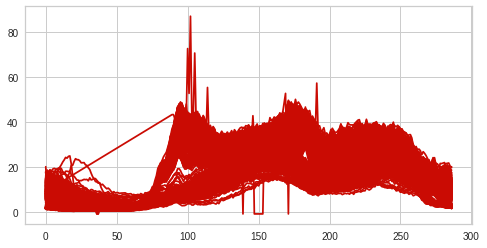

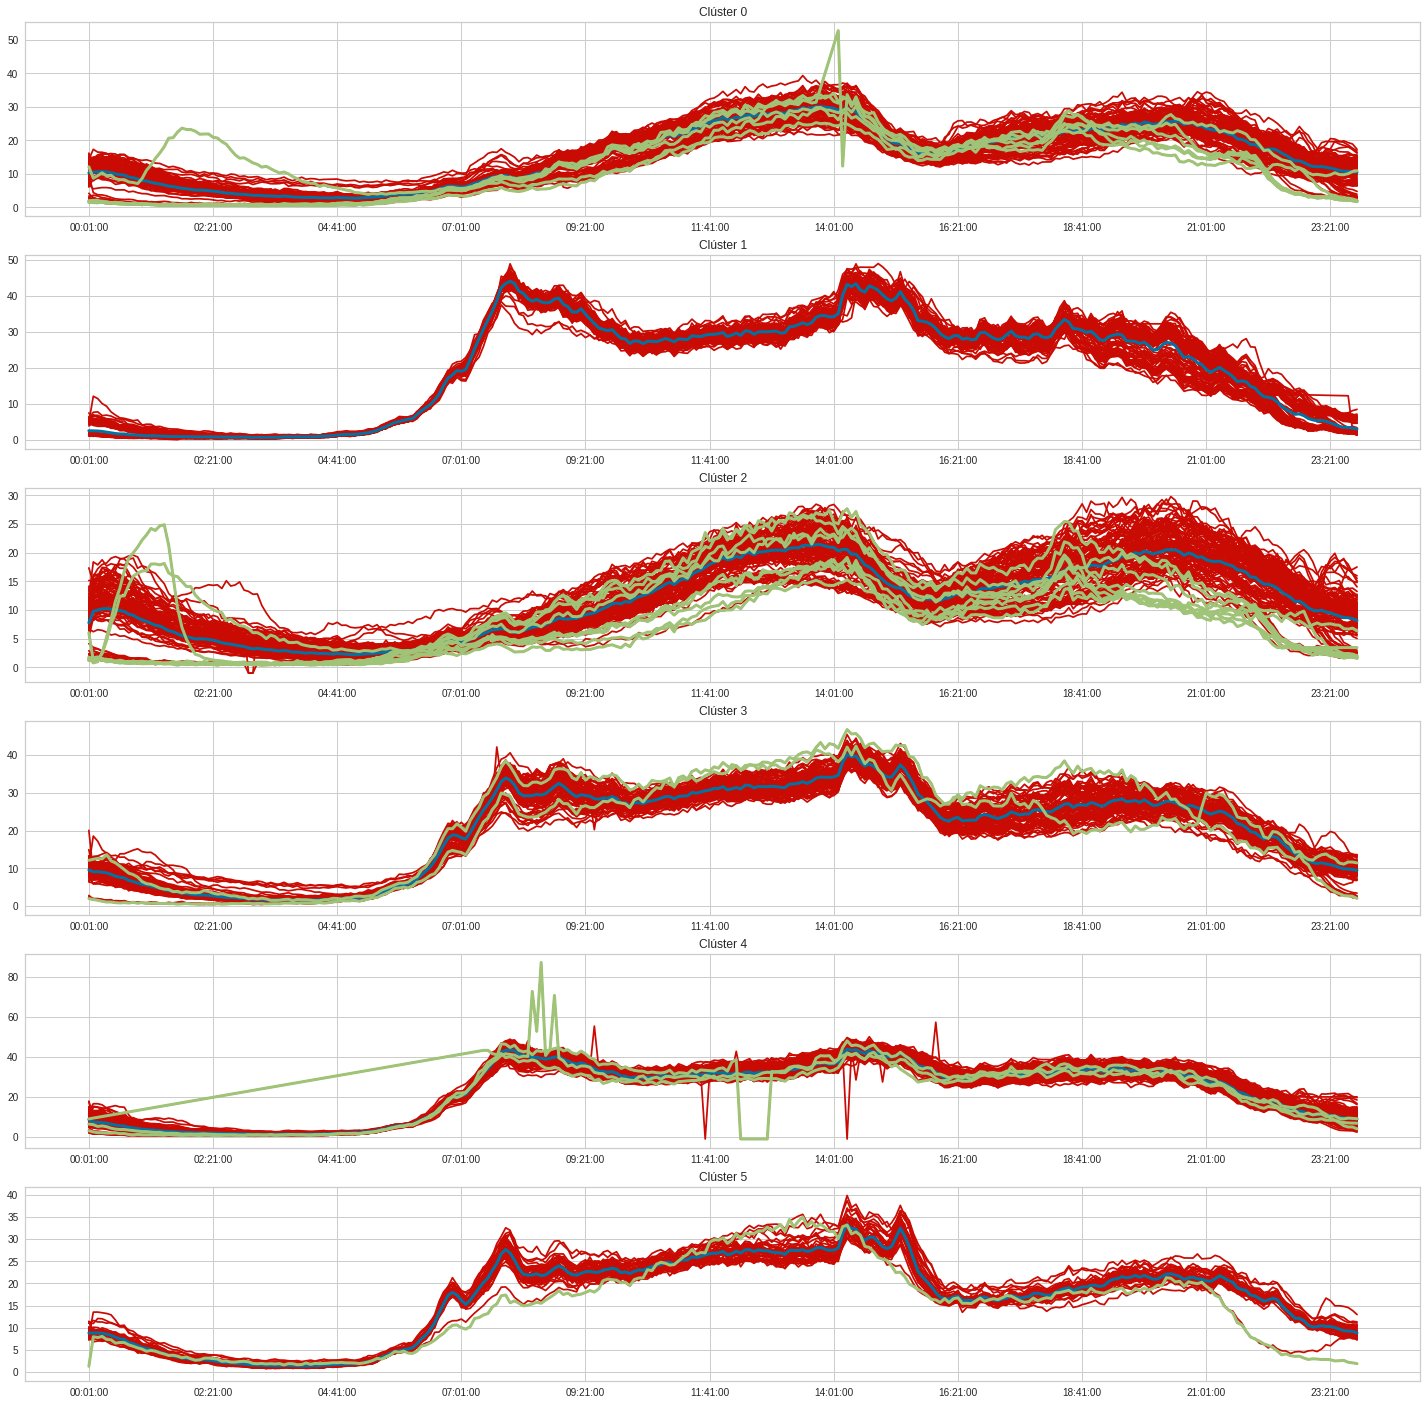

In [ ]:

plt.figure(figsize=(8, 4))
plot_data()
plot_centroids()
plt.show()


A continuación se añaden algunas medidas para ayudar a determinar el número óptimo de clústers. En primer lugar calcularemos las intercias para distintos números de clúster. Del 1 al 9.



In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mySeries)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[8975780.744710421, 2423399.355112961, 1849356.1694605686, 1507495.3363742772, 1293278.5449651498, 1148127.8198171086, 1054098.039204025, 966905.0254427802, 889958.1911466178]


Seguidamente, probaremos el método de Elbow, en el que el número óptimo de clústers viene determinado por el punto de inflexión que se genera a partir de la representación de las inercias con los distintos números de clústers.

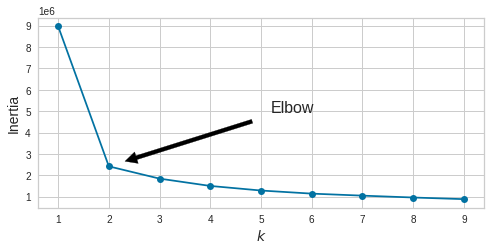

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()


Otra medida para determinar el número de clústers es el silouette score. A mayor score mejor opción es. Es la media de los coeficientes de la silueta entre todas las instacias. El coeficinte de la silueta de una isntancia se calcula de la siguiente forma:
(𝑏−𝑎)/max(𝑎,𝑏)
donde 𝑎 es la distancia meda a otras instancias pertenencientes al mismo clúster y 𝑏 es la media de las distancias a las instancias al clúster más cercano. El coeficiente de la silueta puede varias de -1 a +1: si el coeficiente está cercano a +1 quiere decir que la instancia está bien clasificada en su clúser y que está lejana al resto de clústers, mientras que si es cercano a 0 quiere decir que está cercano a una frontera de clúster, por último si es cercano a -1 quiere decir que se ha asignado a un clúster erróneo.






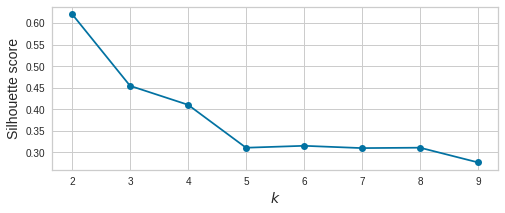

In [ ]:
silhouette_scores = [silhouette_score(mySeries, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()


Como vemos para nuestro modelo el mayor valor se consigue para 2 clústers.

Otra medida que podemos utilizar es el diagrama de la silueta, a partir de este diagrama podemos ver como de bien están repartidos los clústers y si las instancias llegan al coeficiente de la silueta medio para ese número de clústers o no. El número de clústers óptimo vendrá definido por aquella representación en la que al admitir un aumento en el número de clústers se repartan mejor las instancias y todas lleguen al coeficiente de la silueta medio para esa k.

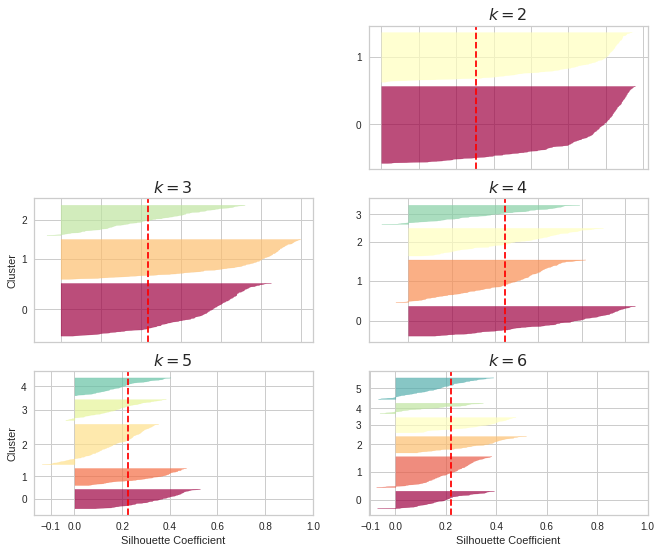

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3, 4,5,6):
    plt.subplot(3, 2, k )
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(mySeries, y_pred)

    padding = len(mySeries) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Para esta representación vemos como para todos los número de clústers expuestos las instancias superan el coeficiente de la silueta, para k más pequeñas los conjuntos son muchos más grandes y se ve que admiten más diferenciación.

Como última medida a probar utilizaremos índice de Calinski-Harabasz. El índice Calinski-Harabasz se basa en la comparación de la relación ponderada entre la suma de los cuadrados (la medida de la separación del clúster) y la suma de los cuadrados dentro del clúster (la medida de cómo se empaquetan estrechamente los puntos dentro de un clúster). Idealmente, los clústeres deben estar bien separados, por lo que la suma entre el valor de los cuadrados debe ser grande, pero los puntos dentro de un clúster deben estar lo más cerca posible el uno del otro, dando como resultado valores más pequeños de la suma dentro del clúster de medida de cuadrados. Dado que el índice Calinski-Harabasz es una relación, con la suma de los cuadrados entre el numerador y la suma de cuadrados dentro del denominador, las soluciones de clúster con valores más grandes del índice corresponden a soluciones "mejores" que las soluciones de clúster con valores más pequeños.

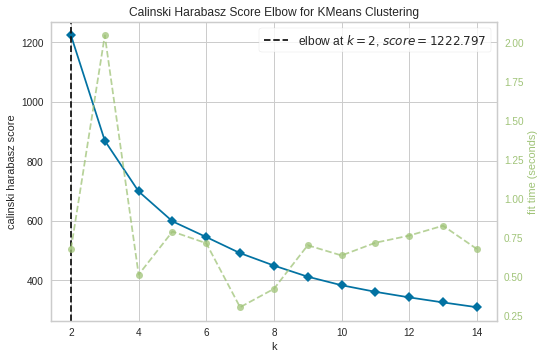

In [ ]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(mySeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Se obtiene el mayor valor para dos clústers. No obstante, todas estas medidas expuestas sirven para orientarnos no quiere decir qe vaya a ser la solución definitiva. Además el número de clústers también va a depender de lo que queramos clasificar.

Vamos a recoger una lista los días de la semana que podemos encontrar para cada clúster.


In [ ]:
dic_dias={}
semana=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
for m in range(len(mySeries)):
  if y_pred[m] in dic_dias.keys():
    set_c=dic_dias[y_pred[m]]
    date_str=namesofMySeries[m].replace('.csv','').split('intensidad.')  #me quedo con la fecha del nombre

    date=datetime.strptime(date_str[1], "%Y.%m.%d")  #la parseo



    set_c.add(semana[date.weekday()])  #la añado al set
    dic_dias[y_pred[m]]=set_c 
  else:
    set_ci=set()

    date_str=namesofMySeries[m].replace('.csv','').split('intensidad.')
    
    date=datetime.strptime(date_str[1], "%Y.%m.%d")

    


    set_ci.add(semana[date.weekday()])
    dic_dias[y_pred[m]]=set_ci
  
print(dic_dias)


683
{7: {'Martes', 'Jueves', 'Viernes', 'Miércoles', 'Lunes'}, 9: {'Jueves', 'Miércoles', 'Lunes', 'Martes'}, 1: {'Martes', 'Jueves', 'Viernes', 'Miércoles', 'Lunes'}, 6: {'Sábado', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 0: {'Miércoles', 'Domingo', 'Sábado', 'Lunes'}, 4: {'Miércoles', 'Martes', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 8: {'Jueves', 'Martes', 'Miércoles', 'Viernes'}, 2: {'Sábado', 'Miércoles', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 3: {'Sábado', 'Miércoles', 'Martes', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 5: {'Martes', 'Jueves', 'Viernes', 'Miércoles', 'Lunes'}}


Como vemos, (depende de la k que utilicemos) pero para valores más altos de k los clústering se epsecializan en fin de semana. No obstante, hay clústers que itegran hasta los 7 dáis de la seman contra todo pronóstico, aún siendo un valor alto de k. Hay veces que se engloba en días de tipo fin de semana el lunes y el viernes, esto es debdo a que en esos años los puentes cayeron la mayoría en lunes y viernes. Para los casos en los que un clúster engloba todo tipo de días de la semana podemos darle explicación con etapas de vaciones, la entrada y salida de niños en colegios tiene un impacto importante en estas series temporales y si están de vaciones esos desplazamientos no se producen.
